In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
from scipy.stats import multivariate_normal

In [2]:
mean = [0, 0]

In [3]:
precision_matrix = np.identity(2)

In [4]:
cov = np.linalg.inv(precision_matrix)

In [5]:
def standard_bivariate(x):
    k = 1/(2*np.pi)
    exponent = np.exp(-0.5*(np.linalg.norm(x, axis=2)**2))
    return k*exponent

In [6]:
def normal_poincare(x):
    return np.exp(-0.5*np.tanh(np.linalg.norm(x, axis=2))**2)

In [7]:
n = 100
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
x, y = np.meshgrid(x, y)
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

In [8]:
z = standard_bivariate(pos)

In [9]:
w = normal_poincare(pos)

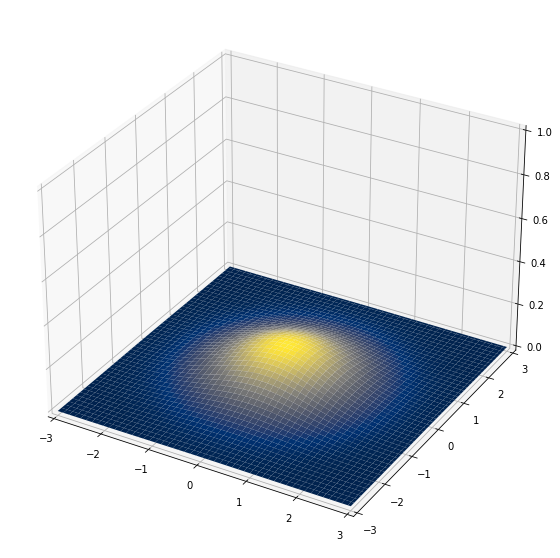

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(0, 1)
ax.plot_surface(x, y, z, cmap=cm.cividis)
plt.savefig("gx.png")

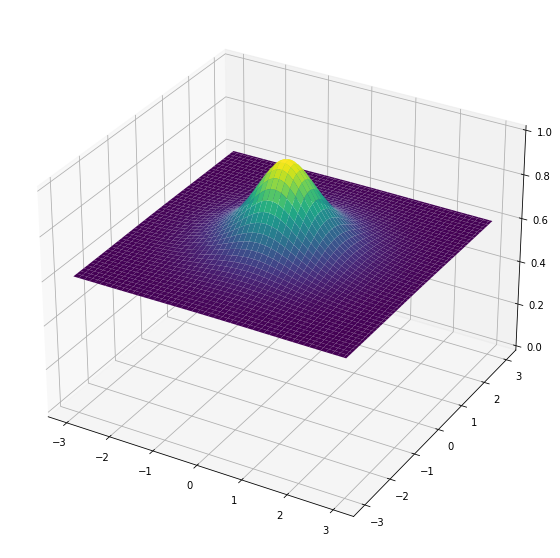

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_zlim3d(0, 1)
ax.plot_surface(x, y, w, cmap=cm.viridis)
plt.savefig("fx.png")

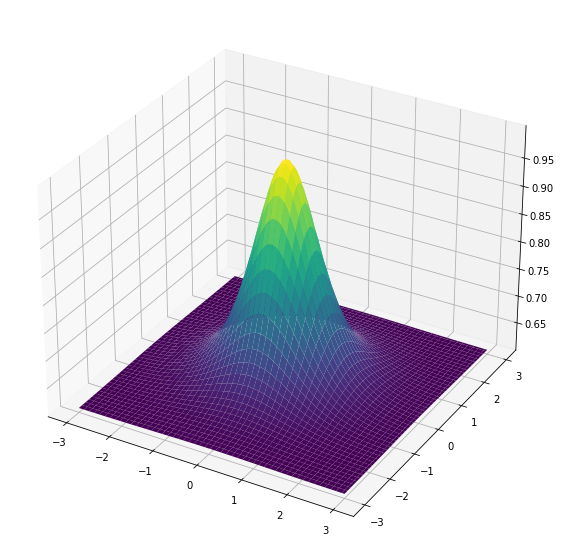

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, w, cmap=cm.viridis)
plt.savefig("ffx.png")

In [13]:
c = np.max(w)/np.max(z)

In [14]:
c1 = 1.8*c

In [15]:
n = 100
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
x, y = np.meshgrid(x, y)
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

In [16]:
w = normal_poincare(pos)

In [17]:
z = standard_bivariate(pos)

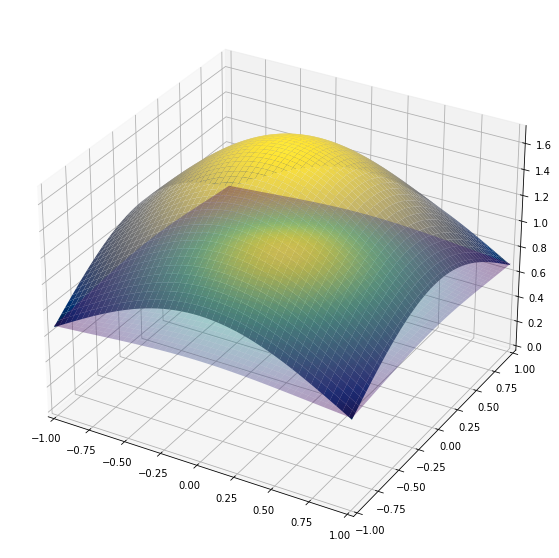

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(0, 1.7)
ax.plot_surface(x, y, w, cmap=cm.viridis, alpha = 0.4)
ax.plot_surface(x, y, c1*z, cmap=cm.cividis, alpha = 1)
plt.savefig("fxcgx")

In [19]:
def standard_bivariate(x):
    k = 1/(2*np.pi)
    exponent = np.exp(-0.5*(np.linalg.norm(x, axis=1)**2))
    return k*exponent

In [20]:
def normal_poincare(x):
    return np.exp(-0.5*np.tanh(np.linalg.norm(x, axis=1))**2)

In [21]:
def sample(size):
    y = multivariate_normal.rvs(mean, cov, size)
    u = np.random.uniform(0, 1, size=size)
    mask = normal_poincare(y) / (c1 * standard_bivariate(y)) > u
    return y[mask]

In [22]:
samples1 = sample(1000)

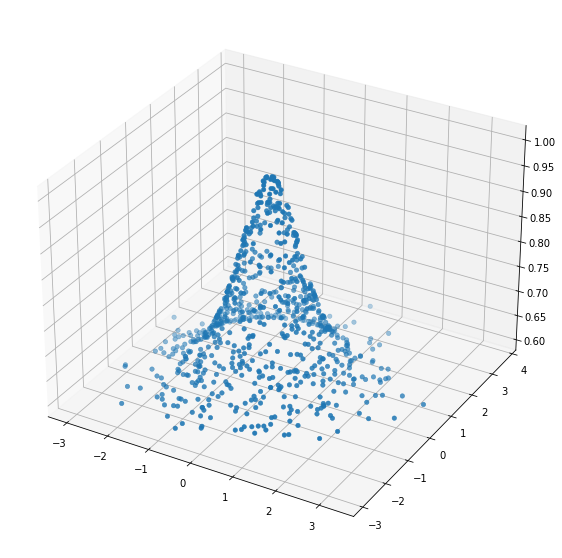

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(samples1[:,0], samples1[:,1], normal_poincare(samples1) ,linewidth=0.5)
plt.savefig("samples1.png")

In [24]:
samples2 = sample(500)

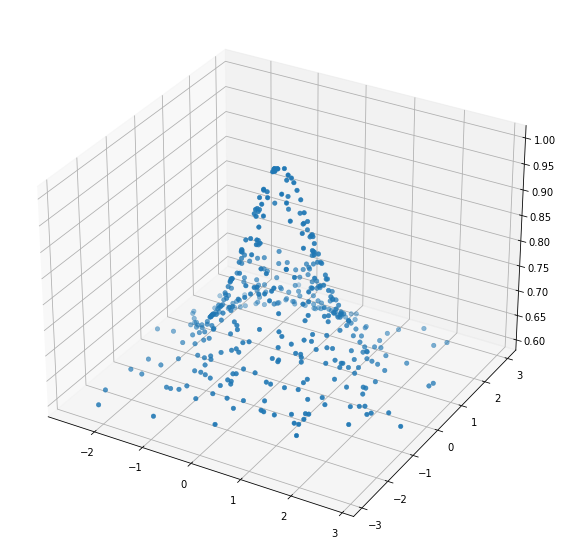

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(samples2[:,0], samples2[:,1], normal_poincare(samples2) ,linewidth=0.5);
plt.savefig("samples2.png")

In [26]:
samples3 = sample(2000)

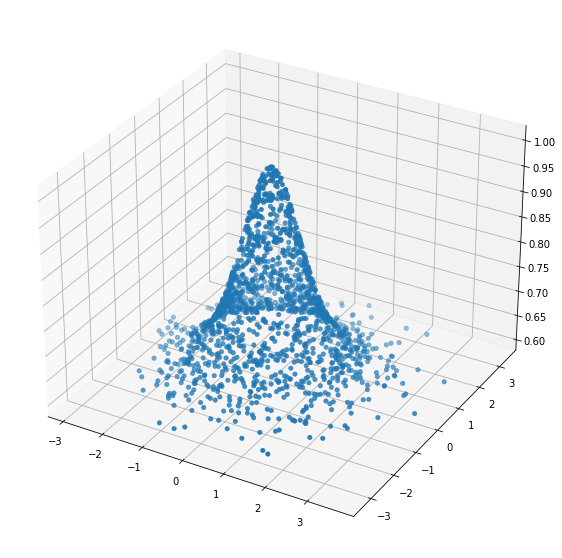

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(samples3[:,0], samples3[:,1], normal_poincare(samples3) ,linewidth=0.5)
plt.savefig("samples3.png")

In [28]:
samples1.shape

(799, 2)

In [29]:
samples2.shape

(406, 2)

In [30]:
samples3.shape

(1631, 2)